In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV DATA

In [2]:
import pandas as pd
airline_data = pd.read_csv('flights.csv')

C:\Users\Adarsh\AppData\Local\Temp\ipykernel_10508\2002930672.py:2: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  airline_data = pd.read_csv('flights.csv')


# Print Shape and Column

In [3]:
print(airline_data.shape)
print(airline_data.columns)

(5819079, 31)
Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')


In [4]:
"""
Analysis:
* Flight airtime will depends on the distance between the source and destination airports.	
* Field ““sched_dep_time“ & “dep_time” will be completey depends on the “hour”  field.
* Hour and dep_time, scheduled_dep_time are highly correlated.
* Distance and air_time are highly correlated
* Arr_delay and dep_delay are also highly correlated
* dep_delay is highly correlated with arr_delay 
* distance is highly correlated with air_time 
* hour is highly correlated with dep_time 
* sched_dep_time is highly correlated with hour.

"""

'\nAnalysis:\n* Flight airtime will depends on the distance between the source and destination airports.\t\n* Field ““sched_dep_time“ & “dep_time” will be completey depends on the “hour”  field.\n* Hour and dep_time, scheduled_dep_time are highly correlated.\n* Distance and air_time are highly correlated\n* Arr_delay and dep_delay are also highly correlated\n* dep_delay is highly correlated with arr_delay \n* distance is highly correlated with air_time \n* hour is highly correlated with dep_time \n* sched_dep_time is highly correlated with hour.\n\n'

# Print Airline Data

In [5]:
airline_data.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


# Data Information

In [6]:
airline_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

# Calling Describe

In [7]:
airline_data.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,5819079.0,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.732926e+06,5.732926e+06,5.730032e+06,5.730032e+06,...,5.819079e+06,5.726566e+06,5.714008e+06,5.819079e+06,5.819079e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06
mean,2015.0,6.524085e+00,1.570459e+01,3.926941e+00,2.173093e+03,1.329602e+03,1.335204e+03,9.370158e+00,1.607166e+01,1.357171e+03,...,1.493808e+03,1.476491e+03,4.407057e+00,2.609863e-03,1.544643e-02,1.348057e+01,7.615387e-02,1.896955e+01,2.347284e+01,2.915290e+00
std,0.0,3.405137e+00,8.783425e+00,1.988845e+00,1.757064e+03,4.837518e+02,4.964233e+02,3.708094e+01,8.895574e+00,4.980094e+02,...,5.071647e+02,5.263197e+02,3.927130e+01,5.102012e-02,1.233201e-01,2.800368e+01,2.143460e+00,4.816164e+01,4.319702e+01,2.043334e+01
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,-8.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2015.0,4.000000e+00,8.000000e+00,2.000000e+00,7.300000e+02,9.170000e+02,9.210000e+02,-5.000000e+00,1.100000e+01,9.350000e+02,...,1.110000e+03,1.059000e+03,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2015.0,7.000000e+00,1.600000e+01,4.000000e+00,1.690000e+03,1.325000e+03,1.330000e+03,-2.000000e+00,1.400000e+01,1.343000e+03,...,1.520000e+03,1.512000e+03,-5.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00
75%,2015.0,9.000000e+00,2.300000e+01,6.000000e+00,3.230000e+03,1.730000e+03,1.740000e+03,7.000000e+00,1.900000e+01,1.754000e+03,...,1.918000e+03,1.917000e+03,8.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,1.900000e+01,2.900000e+01,0.000000e+00
max,2015.0,1.200000e+01,3.100000e+01,7.000000e+00,9.855000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,...,2.400000e+03,2.400000e+03,1.971000e+03,1.000000e+00,1.000000e+00,1.134000e+03,5.730000e+02,1.971000e+03,1.331000e+03,1.211000e+03


In [8]:
Airline_data = airline_data
print(Airline_data)

         YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0        2015      1    1            4      AS             98      N407AS   
1        2015      1    1            4      AA           2336      N3KUAA   
2        2015      1    1            4      US            840      N171US   
3        2015      1    1            4      AA            258      N3HYAA   
4        2015      1    1            4      AS            135      N527AS   
...       ...    ...  ...          ...     ...            ...         ...   
5819074  2015     12   31            4      B6            688      N657JB   
5819075  2015     12   31            4      B6            745      N828JB   
5819076  2015     12   31            4      B6           1503      N913JB   
5819077  2015     12   31            4      B6            333      N527JB   
5819078  2015     12   31            4      B6            839      N534JB   

        ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  \
0  

In [9]:
#Find-out and fill the the missing values .
missing_values = Airline_data.isnull()

In [10]:
#identify missing values
print(missing_values)

          YEAR  MONTH    DAY  DAY_OF_WEEK  AIRLINE  FLIGHT_NUMBER  \
0        False  False  False        False    False          False   
1        False  False  False        False    False          False   
2        False  False  False        False    False          False   
3        False  False  False        False    False          False   
4        False  False  False        False    False          False   
...        ...    ...    ...          ...      ...            ...   
5819074  False  False  False        False    False          False   
5819075  False  False  False        False    False          False   
5819076  False  False  False        False    False          False   
5819077  False  False  False        False    False          False   
5819078  False  False  False        False    False          False   

         TAIL_NUMBER  ORIGIN_AIRPORT  DESTINATION_AIRPORT  \
0              False           False                False   
1              False           False             

In [11]:
#count the missing values
missing_values_count = Airline_data.isnull().sum()
print(missing_values_count)

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64


In [12]:
Airline_data['CANCELLATION_REASON'] = Airline_data['CANCELLATION_REASON'].fillna(Airline_data['CANCELLATION_REASON'].mode()[0] , inplace = True)
Airline_data['CANCELLATION_REASON']


0          None
1          None
2          None
3          None
4          None
           ... 
5819074    None
5819075    None
5819076    None
5819077    None
5819078    None
Name: CANCELLATION_REASON, Length: 5819079, dtype: object

In [13]:
Airline_data[['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']] = Airline_data[['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']].fillna(Airline_data[['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']].median())


In [14]:
pd.set_option('display.max_columns', None)
Airline_data.head(10)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,None,2.0,0.0,2.0,3.0,0.0
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,None,2.0,0.0,2.0,3.0,0.0
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,None,2.0,0.0,2.0,3.0,0.0
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,None,2.0,0.0,2.0,3.0,0.0
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,None,2.0,0.0,2.0,3.0,0.0
5,2015,1,1,4,DL,806,N3730B,SFO,MSP,25,20.0,-5.0,18.0,38.0,217.0,230.0,206.0,1589,604.0,6.0,602,610.0,8.0,0,0,None,2.0,0.0,2.0,3.0,0.0
6,2015,1,1,4,NK,612,N635NK,LAS,MSP,25,19.0,-6.0,11.0,30.0,181.0,170.0,154.0,1299,504.0,5.0,526,509.0,-17.0,0,0,None,2.0,0.0,2.0,3.0,0.0
7,2015,1,1,4,US,2013,N584UW,LAX,CLT,30,44.0,14.0,13.0,57.0,273.0,249.0,228.0,2125,745.0,8.0,803,753.0,-10.0,0,0,None,2.0,0.0,2.0,3.0,0.0
8,2015,1,1,4,AA,1112,N3LAAA,SFO,DFW,30,19.0,-11.0,17.0,36.0,195.0,193.0,173.0,1464,529.0,3.0,545,532.0,-13.0,0,0,None,2.0,0.0,2.0,3.0,0.0
9,2015,1,1,4,DL,1173,N826DN,LAS,ATL,30,33.0,3.0,12.0,45.0,221.0,203.0,186.0,1747,651.0,5.0,711,656.0,-15.0,0,0,None,2.0,0.0,2.0,3.0,0.0


In [15]:
#fill the missing values to One 
Airline_data = airline_data
Airline_data = Airline_data.fillna(1)
print(Airline_data)

         YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0        2015      1    1            4      AS             98      N407AS   
1        2015      1    1            4      AA           2336      N3KUAA   
2        2015      1    1            4      US            840      N171US   
3        2015      1    1            4      AA            258      N3HYAA   
4        2015      1    1            4      AS            135      N527AS   
...       ...    ...  ...          ...     ...            ...         ...   
5819074  2015     12   31            4      B6            688      N657JB   
5819075  2015     12   31            4      B6            745      N828JB   
5819076  2015     12   31            4      B6           1503      N913JB   
5819077  2015     12   31            4      B6            333      N527JB   
5819078  2015     12   31            4      B6            839      N534JB   

        ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  \
0       

In [16]:
#To check the missing value is fill or not 
missing_values_count_check = Airline_data.isnull().sum()
print(missing_values_count_check)

YEAR                   0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
FLIGHT_NUMBER          0
TAIL_NUMBER            0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
TAXI_OUT               0
WHEELS_OFF             0
SCHEDULED_TIME         0
ELAPSED_TIME           0
AIR_TIME               0
DISTANCE               0
WHEELS_ON              0
TAXI_IN                0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
DIVERTED               0
CANCELLED              0
CANCELLATION_REASON    0
AIR_SYSTEM_DELAY       0
SECURITY_DELAY         0
AIRLINE_DELAY          0
LATE_AIRCRAFT_DELAY    0
WEATHER_DELAY          0
dtype: int64


In [17]:
#Drop 'tailnumber' and 'year' fields as there will be not used for the Explotary data analysis.
Airline_data = airline_data.drop(columns=['TAIL_NUMBER','YEAR'])
Airline_data

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,1,1,4,AS,98,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,None,2.0,0.0,2.0,3.0,0.0
1,1,1,4,AA,2336,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,None,2.0,0.0,2.0,3.0,0.0
2,1,1,4,US,840,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,None,2.0,0.0,2.0,3.0,0.0
3,1,1,4,AA,258,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,None,2.0,0.0,2.0,3.0,0.0
4,1,1,4,AS,135,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,None,2.0,0.0,2.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,12,31,4,B6,688,LAX,BOS,2359,2355.0,-4.0,22.0,17.0,320.0,298.0,272.0,2611,749.0,4.0,819,753.0,-26.0,0,0,None,2.0,0.0,2.0,3.0,0.0
5819075,12,31,4,B6,745,JFK,PSE,2359,2355.0,-4.0,17.0,12.0,227.0,215.0,195.0,1617,427.0,3.0,446,430.0,-16.0,0,0,None,2.0,0.0,2.0,3.0,0.0
5819076,12,31,4,B6,1503,JFK,SJU,2359,2350.0,-9.0,17.0,7.0,221.0,222.0,197.0,1598,424.0,8.0,440,432.0,-8.0,0,0,None,2.0,0.0,2.0,3.0,0.0
5819077,12,31,4,B6,333,MCO,SJU,2359,2353.0,-6.0,10.0,3.0,161.0,157.0,144.0,1189,327.0,3.0,340,330.0,-10.0,0,0,None,2.0,0.0,2.0,3.0,0.0


# Airline with highest and lowest mean speed

In [18]:

print(airline_data.columns)

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')


In [19]:
Airline_data['ORIGIN_AIRPORT'] = Airline_data['ORIGIN_AIRPORT'].astype(str)
print(Airline_data['ORIGIN_AIRPORT'])


0          ANC
1          LAX
2          SFO
3          LAX
4          SEA
          ... 
5819074    LAX
5819075    JFK
5819076    JFK
5819077    MCO
5819078    JFK
Name: ORIGIN_AIRPORT, Length: 5819079, dtype: object


In [20]:
# USe this Function because Speed = Distance / time
Airline_data['FLIGHT_SPEED'] = Airline_data['DISTANCE']/Airline_data['AIR_TIME']

In [21]:
#print the flight speed data 
Airline_data['FLIGHT_SPEED']

0          8.568047
1          8.859316
2          8.631579
3          9.077519
4          7.276382
             ...   
5819074    9.599265
5819075    8.292308
5819076    8.111675
5819077    8.256944
5819078    8.338624
Name: FLIGHT_SPEED, Length: 5819079, dtype: float64

In [22]:
# use aggregate() function to get the average value of the columns in the dataframe
Mean_speed_Airline = Airline_data.groupby('AIRLINE').agg({'FLIGHT_SPEED':[np.mean]})
print(f'The Mean Speed of Airline : \n \n {Mean_speed_Airline}')

The Mean Speed of Airline : 
 
         FLIGHT_SPEED
                mean
AIRLINE             
AA          7.127989
AS          7.258512
B6          6.992831
DL          6.990550
EV          6.078062
F9          7.354321
HA          5.729143
MQ          6.014991
NK          7.274998
OO          6.143314
UA          7.445886
US          6.851808
VX          7.256722
WN          6.919958


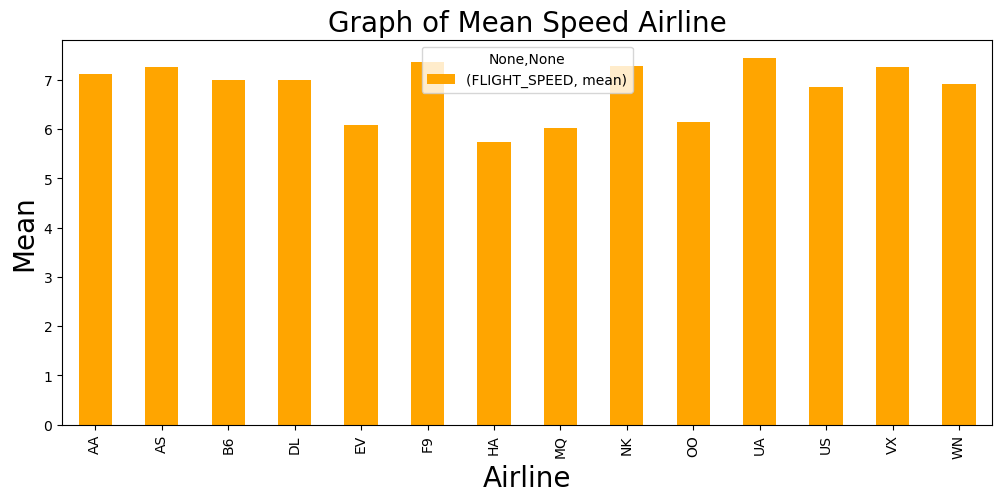

In [23]:
Mean_speed_Airline[:14].plot(kind="bar",figsize=(12,5),color = ("orange"))
plt.xlabel("Airline",fontsize=(20))
plt.ylabel("Mean",fontsize=(20))
plt.title("Graph of Mean Speed Airline",fontsize=(20));

In [24]:
# to find the highest mean speed of airline  i used idxmax 
# and the str() function converts the specified value into a string.

highest_airline_mean_speed = str(Mean_speed_Airline.idxmax())
print(f'The Highest Airline mean Speed is : \n \n{highest_airline_mean_speed}')

The Highest Airline mean Speed is : 
 
FLIGHT_SPEED  mean    UA
dtype: object


In [25]:
# to find the Lowest mean speed of airline  i used idxmin 
Lowest_airline_mean_speed = str(Mean_speed_Airline.idxmin())
print(f'The Lowest Airline mean Speed is : \n \n{Lowest_airline_mean_speed}')

The Lowest Airline mean Speed is : 
 
FLIGHT_SPEED  mean    HA
dtype: object


# Airports most and least busy 

In [26]:
print(airline_data.columns)

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')


In [27]:
Airline_data = airline_data


In [28]:
airline_data['DESTINATION_AIRPORT'] = airline_data['DESTINATION_AIRPORT'].astype(str)
print(airline_data['DESTINATION_AIRPORT'])


0          SEA
1          PBI
2          CLT
3          MIA
4          ANC
          ... 
5819074    BOS
5819075    PSE
5819076    SJU
5819077    SJU
5819078    BQN
Name: DESTINATION_AIRPORT, Length: 5819079, dtype: object


In [29]:
# use aggregate() function to get the average value of the columns in the dataframe
#sorts a data frame in Ascending or Descending .
# Ascending = false means it is in Descreasing order that means the busiest airline is above
Most_Busiest_Airline= airline_data.groupby(['DESTINATION_AIRPORT']).agg({'ARRIVAL_DELAY':[np.mean,np.size]}).sort_values(by=[('ARRIVAL_DELAY','mean')], ascending=False)
Most_Busiest_Airline.head()

ARRIVAL_DELAY      
                             mean  size
DESTINATION_AIRPORT                    
13964                   26.906250    36
STC                     23.025974    82
ILG                     21.989474    98
14025                   18.000000    13
TTN                     17.433901  2836

Text(0, 0.5, 'Mean')

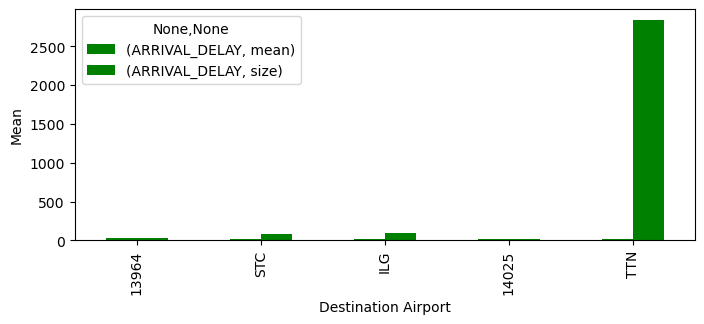

In [30]:
Most_Busiest_Airline[0:5].plot(kind="bar" , figsize=(8,3),color = ("Green"))
plt.xlabel("Destination Airport",fontsize=(10))
plt.ylabel("Mean",fontsize=(10),)

In [31]:
print(f'the Most Busiest Airline is : \n \n {Most_Busiest_Airline.head(1)}')

the Most Busiest Airline is : 
 
                     ARRIVAL_DELAY     
                             mean size
DESTINATION_AIRPORT                   
13964                    26.90625   36


In [32]:
# Ascending = True means it is in Ascending order that means the least busy airline is above 

Least_busy_Airline  = Airline_data.groupby(['DESTINATION_AIRPORT']).agg({'ARRIVAL_DELAY':[np.mean,np.size]}).sort_values(by=[('ARRIVAL_DELAY','mean')], ascending=True)
Least_busy_Airline.head()

ARRIVAL_DELAY     
                             mean size
DESTINATION_AIRPORT                   
12016                  -16.862069   31
11067                  -16.199029  206
15295                  -15.943182   88
10165                  -15.777778    9
12335                  -14.321429   57

Text(0, 0.5, 'Mean')

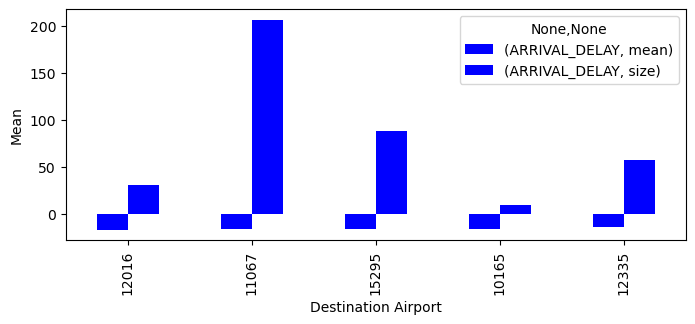

In [33]:
Least_busy_Airline[0:5].plot(kind="bar" , figsize=(8,3),color = ("Blue"))
plt.xlabel("Destination Airport",fontsize=(10))
plt.ylabel("Mean",fontsize=(10),)

In [34]:
print(f'the Least Busy Airline is : \n \n {Least_busy_Airline.head(1)}')

the Least Busy Airline is : 
 
                     ARRIVAL_DELAY     
                             mean size
DESTINATION_AIRPORT                   
12016                  -16.862069   31


# Months During which airports are most and least busy

In [35]:
print(airline_data.columns)

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')


In [36]:
Airline_During_Month_delay = Airline_data.groupby(['MONTH']).agg({'DEPARTURE_DELAY':[np.mean],'ARRIVAL_DELAY':[np.mean,np.size]})
Airline_During_Month_delay

DEPARTURE_DELAY ARRIVAL_DELAY        
                 mean          mean    size
MONTH                                      
1            9.759471      5.813583  469968
2           11.885284      8.320500  429191
3            9.660903      4.920673  504312
4            7.721885      3.163190  485151
5            9.454144      4.485019  496993
6           13.986016      9.601590  503897
7           11.394664      6.431775  520718
8            9.932045      4.607372  510536
9            4.823560     -0.772571  464946
10           4.982661     -0.780390  486165
11           6.944197      1.100784  467972
12          11.783529      6.092903  479230

Text(0, 0.5, 'DEPARTURE_DELAY')

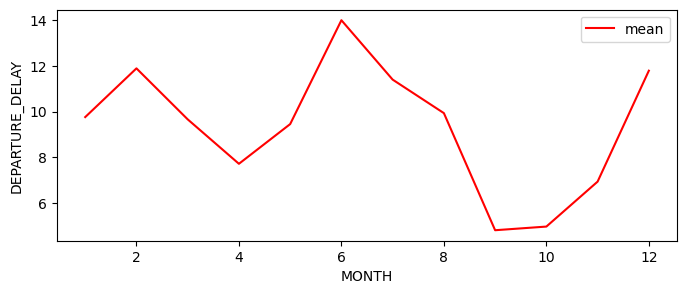

In [37]:
# plot of Airline during Month 
Airline_During_Month_delay['DEPARTURE_DELAY'][0:12].plot(figsize=(8,3),color = ("Red"))
plt.xlabel("MONTH",fontsize=(10))
plt.ylabel("DEPARTURE_DELAY",fontsize=(10),)

In [38]:
# make a total delay column and put the mean value of Departure delay and arrival delay
Airline_During_Month_delay['total_delay'] = Airline_During_Month_delay[('DEPARTURE_DELAY','mean')] + Airline_During_Month_delay[('ARRIVAL_DELAY','mean')]

In [39]:
#Months During airports are most busy
# Ascending = False means it is in Descending order that means the bugiest airline is above 
# used head(1) function display the first data
Airline_During_Month_delay.sort_values(by='total_delay', ascending=False).head(1)

DEPARTURE_DELAY ARRIVAL_DELAY         total_delay
                 mean          mean    size            
MONTH                                                  
6           13.986016       9.60159  503897   23.587606

In [40]:
#Months During airports are least busy
#used tail(1) function display the last data data
Airline_During_Month_delay.sort_values(by='total_delay', ascending=False).tail(1)

DEPARTURE_DELAY ARRIVAL_DELAY         total_delay
                 mean          mean    size            
MONTH                                                  
9             4.82356     -0.772571  464946    4.050989

# Which airline should you fly on to avoid significant delays?

In [41]:
print(Airline_data.columns)

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')


In [42]:
# Calculate the average delay for each airline
Avoid_significant_delays = Airline_data.groupby('AIRLINE')['AIRLINE_DELAY'].mean()

# Sort the results in ascending order
Avoid_significant_delays = Avoid_significant_delays.sort_values()


print(f'Airline should you fly on to avoid significant delays : \n \n{Avoid_significant_delays.index[0]}')


Airline should you fly on to avoid significant delays : 
 
VX


In [43]:
Airline_data = airline_data
print(Airline_data.head(1))

   YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0  2015      1    1            4      AS             98      N407AS   

  ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  DEPARTURE_TIME  \
0            ANC                 SEA                    5          2354.0   

   DEPARTURE_DELAY  TAXI_OUT  WHEELS_OFF  SCHEDULED_TIME  ELAPSED_TIME  \
0            -11.0      21.0        15.0           205.0         194.0   

   AIR_TIME  DISTANCE  WHEELS_ON  TAXI_IN  SCHEDULED_ARRIVAL  ARRIVAL_TIME  \
0     169.0      1448      404.0      4.0                430         408.0   

   ARRIVAL_DELAY  DIVERTED  CANCELLED CANCELLATION_REASON  AIR_SYSTEM_DELAY  \
0          -22.0         0          0                None               2.0   

   SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  WEATHER_DELAY  
0             0.0            2.0                  3.0            0.0  


# Change to hh:mm:ss 


In [44]:
import datetime

Airline_data['SCHEDULED_ARRIVAL'] = pd.to_datetime(Airline_data["SCHEDULED_ARRIVAL"], unit='s').dt.strftime("%H:%M:%S")
Airline_data['WHEELS_OFF'] = pd.to_datetime(Airline_data["WHEELS_OFF"], unit='s').dt.strftime("%H:%M:%S")
Airline_data['WHEELS_ON'] = pd.to_datetime(Airline_data["WHEELS_ON"], unit='s').dt.strftime("%H:%M:%S")


In [45]:
Airline_data['SCHEDULED_ARRIVAL']

0          00:07:10
1          00:12:30
2          00:13:26
3          00:13:25
4          00:05:20
             ...   
5819074    00:13:39
5819075    00:07:26
5819076    00:07:20
5819077    00:05:40
5819078    00:07:20
Name: SCHEDULED_ARRIVAL, Length: 5819079, dtype: object

In [46]:
""" Add one more column 'Arrival_delay_status' to dataset 
which contain the arrival status as ON,BEFORE,AFTER on top of arrival delay.
If arrival delay is -ve means BEFORE,+ve means AFTER,if 0 means ON-TIME."""


" Add one more column 'Arrival_delay_status' to dataset \nwhich contain the arrival status as ON,BEFORE,AFTER on top of arrival delay.\nIf arrival delay is -ve means BEFORE,+ve means AFTER,if 0 means ON-TIME."

In [47]:
def arrival_delay_status(delay):
    if delay < 0:
        return 'BEFORE'
    elif delay > 0:
        return 'AFTER'
    else:
        return 'ON-TIME'

Airline_data['Arrival_delay_status'] = Airline_data['ARRIVAL_DELAY'].apply(arrival_delay_status)


In [48]:
"""
Add a new columns of original airport name and dest_airport_name using airport.csv file
    Hint: JOin IATA_code  from Airport.csv & origin_airport column from flight.csv and fetch airport column  for this
"""

'\nAdd a new columns of original airport name and dest_airport_name using airport.csv file\n    Hint: JOin IATA_code  from Airport.csv & origin_airport column from flight.csv and fetch airport column  for this\n'

In [49]:
print(Airline_data.columns)

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'Arrival_delay_status'],
      dtype='object')


In [50]:
import pandas as pd
airport_data = pd.read_csv('airports.csv')

In [51]:
print(airport_data.columns)

Index(['IATA_CODE', 'AIRPORT', 'CITY', 'STATE', 'COUNTRY', 'LATITUDE',
       'LONGITUDE'],
      dtype='object')


In [52]:
Airline_data = pd.merge(Airline_data, airport_data, left_on='ORIGIN_AIRPORT', right_on='IATA_CODE')
# Rename the 'airport' column to 'origin_airport_name'
Airline_data = Airline_data.rename(columns={'AIRPORT': 'ORIGIN_AIRPORT_NAME'})
print(Airline_data)

         YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0        2015      1    1            4      AS             98      N407AS   
1        2015      1    1            4      AS            108      N309AS   
2        2015      1    1            4      DL           1560      N3743H   
3        2015      1    1            4      AS            122      N413AS   
4        2015      1    1            4      AS            136      N431AS   
...       ...    ...  ...          ...     ...            ...         ...   
5332909  2015      9    4            5      B6            863      N198JB   
5332910  2015      9    5            6      B6            863      N318JB   
5332911  2015      9    6            7      B6            863      N183JB   
5332912  2015      9    7            1      B6            863      N323JB   
5332913  2015      9    8            2      B6            863      N373JB   

        ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  \
0       

In [53]:
# Merge the flight.csv DataFrame with the airport.csv DataFrame on the IATA_code column
Airline_data = pd.merge(Airline_data, airport_data, left_on='DESTINATION_AIRPORT', right_on='IATA_CODE')


In [54]:
# Rename the 'airport' column to 'dest_airport_name'
Airline_data = Airline_data.rename(columns={'AIRPORT': 'DESTIONATION_AIRPORT_NAME'})
print(Airline_data)

         YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0        2015      1    1            4      AS             98      N407AS   
1        2015      1    1            4      AS            108      N309AS   
2        2015      1    1            4      DL           1560      N3743H   
3        2015      1    1            4      AS            136      N431AS   
4        2015      1    1            4      AS            134      N464AS   
...       ...    ...  ...          ...     ...            ...         ...   
5332909  2015     12   27            7      AS             64      N764AS   
5332910  2015     12   28            1      AS             64      N768AS   
5332911  2015     12   29            2      AS             64      N762AS   
5332912  2015     12   30            3      AS             64      N765AS   
5332913  2015     12   31            4      AS             64      N768AS   

        ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  \
0       

In [55]:
print(Airline_data.columns)

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'Arrival_delay_status',
       'IATA_CODE_x', 'ORIGIN_AIRPORT_NAME', 'CITY_x', 'STATE_x', 'COUNTRY_x',
       'LATITUDE_x', 'LONGITUDE_x', 'IATA_CODE_y', 'DESTIONATION_AIRPORT_NAME',
       'CITY_y', 'STATE_y', 'COUNTRY_y', 'LATITUDE_y', 'LONGITUDE_y'],
      dtype='object')


# 	Airlines with Min & Max delays

In [56]:
airlines_delay_summary= Airline_data.groupby(['AIRLINE']).agg({'DEPARTURE_DELAY':[np.mean],'ARRIVAL_DELAY':[np.mean,np.size]})
airlines_delay_summary["total_mean_delay"] = airlines_delay_summary[('DEPARTURE_DELAY','mean')] + airlines_delay_summary[('ARRIVAL_DELAY','mean')]
airlines_delay_summary= airlines_delay_summary.sort_values(by='total_mean_delay', ascending=False)
airlines_delay_summary


DEPARTURE_DELAY ARRIVAL_DELAY          total_mean_delay
                   mean          mean     size                 
AIRLINE                                                        
NK            16.683317     15.210786   107171        31.894104
F9            14.267977     13.729468    82735        27.997445
UA            15.131718      6.211316   469829        21.343034
B6            11.828654      6.949339   245135        18.777993
MQ            10.685483      7.316540   272650        18.002023
EV             9.076964      6.964550   526249        16.041514
WN            10.995318      4.837831  1157339        15.833150
OO             8.181225      6.221438   539545        14.402663
VX             9.211211      4.979539    56439        14.190750
AA             9.330882      3.935214   648694        13.266095
US             6.141137      3.706209   198715         9.847346
DL             7.763099      0.680265   800329         8.443364
HA             0.514001      2.161856    70030         2.675857
AS             1.957637     -0.791409   158054         1.166228

In [57]:
airlines_delay_summary.head(1)


DEPARTURE_DELAY ARRIVAL_DELAY         total_mean_delay
                   mean          mean    size                 
AIRLINE                                                       
NK            16.683317     15.210786  107171        31.894104

In [58]:
airlines_delay_summary.tail(1)

DEPARTURE_DELAY ARRIVAL_DELAY         total_mean_delay
                   mean          mean    size                 
AIRLINE                                                       
AS             1.957637     -0.791409  158054         1.166228

# Calculate % of departure_Delay on overall delay

In [59]:
airlines_delay_summary  = Airline_data.groupby(['AIRLINE']).agg({'DEPARTURE_DELAY':[np.mean],
                                                               'ARRIVAL_DELAY':[np.mean,np.size]})
airlines_delay_summary

DEPARTURE_DELAY ARRIVAL_DELAY         
                   mean          mean     size
AIRLINE                                       
AA             9.330882      3.935214   648694
AS             1.957637     -0.791409   158054
B6            11.828654      6.949339   245135
DL             7.763099      0.680265   800329
EV             9.076964      6.964550   526249
F9            14.267977     13.729468    82735
HA             0.514001      2.161856    70030
MQ            10.685483      7.316540   272650
NK            16.683317     15.210786   107171
OO             8.181225      6.221438   539545
UA            15.131718      6.211316   469829
US             6.141137      3.706209   198715
VX             9.211211      4.979539    56439
WN            10.995318      4.837831  1157339

In [60]:

departure_percentage = airlines_delay_summary[('DEPARTURE_DELAY','mean')].sum()/12/(airlines_delay_summary["total_mean_delay"].sum()/12)*100
departure_percentage

KeyError: 'total_mean_delay'

In [ ]:
z